# Data Visualization Using Python

# Part 1: Introduction, data wrangling with python, matplotlib, plotly

## 0. Introduction
In previous laboratory activities, our focus has been on the integration of diverse technologies, including Arduino, Raspberry Pi, APIs, and Python, all aimed at the acquisition of data for specific engineering purposes. The overarching goal has been to monitor and regulate the behavior of controlled loads, synchronizing their operations with various external signals such as light intensity, market prices, and temporal parameters.

Now, as we transition into this session, we're shifting our focus to data visualization—a powerful tool widely adopted in the corporate environment. Its strength lies in its ability to provide a clear picture of complex data, helping us draw conclusions and make informed decisions.

In the forthcoming session, we will delve into the domain of data visualization using a comprehensive wind turbine dataset sourced from DTU, accessible through DOIs 10.11583/DTU.7856891 and 10.11583/DTU.7856888. The dataset under consideration comprises historical observations pertaining to the V52 Wind Turbine. Our analysis will be based on a structured examination of these historical observations, facilitated by the utilization of a CSV file.

![V52 Wind Turbine](./images/v52turbine_3.jpg)

To effectively conduct our analysis, we will employ distinct Python libraries renowned for their prowess in data visualization. Specifically, our toolkit for this laboratory session will encompass Matplotlib, Plotly, and Dash, equipping participants with a versatile set of tools to explore, interpret, and communicate insights derived from the V52 Wind Turbine dataset.

## 1. Set Up
### 1.1. Importing Libraries



In [5]:
# data processing
import pandas as pd
# numerical library
import numpy as np
# timer, dates
import datetime
# data visualization libraries
import matplotlib.pyplot as plt

### 1.2. Loading Data

In [8]:
df = pd.read_csv('./data/V52_ExtensiveData.csv', sep='\t', skiprows=12)

*Important note*: before importing a file into memory in your computing environment, do check the typew of file you are importing. Most times the file extensions are not very descriptive. For instance, in this case we are importing a .csv file. Notice that the import process is effective only when the *separator* parameter is specified, otherwise the pandas dataframe would  not understand correctly the structure of data (try yourself removing the separator to see what happens).
This is because the original file containing data is not a *"comma separated value* (.csv) file, but in fact a *tab separated value* (.tsv). You can easily verify this by opening the file with a text editor. This is always a good practice before starting the analysis of a dataset.
By doing this, you can even realize that the first 12 rows are in fact useless and can be ignored in the import process.

## 2. Data Pre-processing
### 2.1. First look at the dataset

Have a quick look at the dataset and understand basic things like the **features** contained in the dataset (represented by the columns) and the number of **observations** (number of elements) in the dataset.
This commands are pretty useful for a first quick look:

In [13]:
df.head()

,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
0,201801010000,4.71803,200.743,64.6673,0.000860,33.4251,0.566131,6.45730,1.0
1,201801010010,5.44100,201.768,70.8152,-0.000657,26.3829,0.765691,6.66940,1.0
2,201801010020,5.32178,197.962,80.8037,-0.000617,30.2002,0.603442,6.99113,1.0
3,201801010030,5.95325,204.606,86.1123,-0.002370,43.1192,0.872915,5.47062,1.0
4,201801010040,6.17765,204.398,110.8570,0.001033,29.9507,0.550160,4.93713,1.0


In [15]:
df.shape

(52241, 9)

In [17]:
df.dtypes

Date              int64
Wsp_44m         float64
Wdir_41m        float64
ActPow          float64
RePow           float64
ActPow_std      float64
Wsp_44m_std     float64
Wdir_41m_std    float64
stability       float64
dtype: object

Questions for you:

1. How many rows do we have?
2. Which types of variables do we have?
3. What’s the shape of the Dataframe?
4. Which data-types does the Dataframe have?
5. Are all the columns in the right format?
6. Do we have to change any of the data-types?
7. Are the columns' name useful for us? What's the information they are trying to tell us?
8. Do you know the units of measurement?
9. For how long have we been taking data?
10. What’s the time granularity?
11. What do these data tell us? (storytelling...)

### 2.2. Changing columns' type

In [21]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')

In [22]:
df.head()

,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
0,2018-01-01 00:00:00,4.71803,200.743,64.6673,0.000860,33.4251,0.566131,6.45730,1.0
1,2018-01-01 00:10:00,5.44100,201.768,70.8152,-0.000657,26.3829,0.765691,6.66940,1.0
2,2018-01-01 00:20:00,5.32178,197.962,80.8037,-0.000617,30.2002,0.603442,6.99113,1.0
3,2018-01-01 00:30:00,5.95325,204.606,86.1123,-0.002370,43.1192,0.872915,5.47062,1.0
4,2018-01-01 00:40:00,6.17765,204.398,110.8570,0.001033,29.9507,0.550160,4.93713,1.0


This is a typical step to do when working with time-series data. Converting from numerical format *float64* to the pyhton date-type format *datetime*

### 2.3. Check for missing data (NaN)

Check if Not a Number values are present.

In [28]:
# for each column
df.isna().sum()

Date               0
Wsp_44m         3253
Wdir_41m        3253
ActPow           138
RePow            138
ActPow_std       138
Wsp_44m_std     3253
Wdir_41m_std    3253
stability          0
dtype: int64

In [30]:
# overall
df.isna().sum().sum()

13426

Let's try to visualize the rows where NaN values are.

In [33]:
bool = pd.isnull(df["Wsp_44m"])
df[bool]

,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
19015,2018-05-14 09:20:00,NaN,NaN,-1.096810,-1.285870,1.004990,NaN,NaN,0.0
19016,2018-05-14 09:30:00,NaN,NaN,-1.030800,-0.895310,0.982677,NaN,NaN,0.0
19017,2018-05-14 09:40:00,NaN,NaN,-0.903863,-0.680247,0.716444,NaN,NaN,0.0
19018,2018-05-14 09:50:00,NaN,NaN,-0.823533,-0.763457,0.782019,NaN,NaN,0.0
19019,2018-05-14 10:00:00,NaN,NaN,-0.975510,-0.802763,0.841965,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
27102,2018-07-09 13:00:00,NaN,NaN,201.837000,-0.001510,67.718100,NaN,NaN,0.0
27103,2018-07-09 13:20:00,NaN,NaN,220.969000,-0.006363,51.026400,NaN,NaN,0.0
27104,2018-07-09 13:30:00,NaN,NaN,18.443400,0.800440,65.841100,NaN,NaN,0.0
27105,2018-07-09 13:40:00,NaN,NaN,-1.544820,-1.853780,0.819548,NaN,NaN,0.0


In [35]:
bool = pd.isnull(df["ActPow"])
df[bool]

,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
395,2018-01-03 18:30:00,4.11082,166.586,NaN,NaN,NaN,0.877951,9.456860,0.0
3413,2018-01-23 23:30:00,11.35410,196.849,NaN,NaN,NaN,0.451371,2.592660,1.0
3414,2018-01-23 23:40:00,11.43910,197.141,NaN,NaN,NaN,0.000005,0.000000,1.0
3415,2018-01-23 23:50:00,11.43910,197.141,NaN,NaN,NaN,0.000005,0.000000,1.0
3416,2018-01-24 00:00:00,11.43910,197.141,NaN,NaN,NaN,0.000005,0.000000,1.0
...,...,...,...,...,...,...,...,...,...
42393,2018-10-24 07:30:00,14.33320,332.584,NaN,NaN,NaN,0.000009,0.000058,1.0
42394,2018-10-24 07:40:00,14.33320,332.584,NaN,NaN,NaN,0.000009,0.000058,1.0
42395,2018-10-24 07:50:00,14.33320,332.584,NaN,NaN,NaN,0.000009,0.000058,1.0
42396,2018-10-24 08:00:00,14.33320,332.584,NaN,NaN,NaN,0.000009,0.000058,1.0


Yes, many NaN are present in the dataset. How to treat them? Ideally, each variable should be treated separately in the most meanigful way.

In general these techniques are applicable:
- **Imputation**: Filling missing values with statistical measures like the mean, median, mode, or a specific value (the previous value, etc).
- **Predictive models**: Using a model to predict missing values based on other features.
- **Interpolation**: A polynomial of the desired order can alwyas be fit between 2 points (linear, polynomial interpolation).
- **Deletion**: Removing rows or columns with too many missing values (if appropriate).
- **Flag missing**: Add a new feature indicating where data is missing.

In [39]:
# storing the indexes of rows with NaN values
rows_nan = df[bool].index

In [41]:
# replace with a specific value
df_replaced = df.replace(to_replace = np.nan, value = -99)
df_replaced.isna().sum().sum()

0

In [43]:
# take a look at the changes
df_replaced.loc[rows_nan]

,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
395,2018-01-03 18:30:00,4.11082,166.586,-99.0,-99.0,-99.0,0.877951,9.456860,0.0
3413,2018-01-23 23:30:00,11.35410,196.849,-99.0,-99.0,-99.0,0.451371,2.592660,1.0
3414,2018-01-23 23:40:00,11.43910,197.141,-99.0,-99.0,-99.0,0.000005,0.000000,1.0
3415,2018-01-23 23:50:00,11.43910,197.141,-99.0,-99.0,-99.0,0.000005,0.000000,1.0
3416,2018-01-24 00:00:00,11.43910,197.141,-99.0,-99.0,-99.0,0.000005,0.000000,1.0
...,...,...,...,...,...,...,...,...,...
42393,2018-10-24 07:30:00,14.33320,332.584,-99.0,-99.0,-99.0,0.000009,0.000058,1.0
42394,2018-10-24 07:40:00,14.33320,332.584,-99.0,-99.0,-99.0,0.000009,0.000058,1.0
42395,2018-10-24 07:50:00,14.33320,332.584,-99.0,-99.0,-99.0,0.000009,0.000058,1.0
42396,2018-10-24 08:00:00,14.33320,332.584,-99.0,-99.0,-99.0,0.000009,0.000058,1.0


A more powerful approach is to replace the NaN with interpolation techniques. These can follows several methods, linear, polynomial, etc. Take a look at the pandas documentation online for all the options. Take the most suited to your case.

In [46]:
# replace with interpolation (linear)
df_int = df.iloc[:,1:].interpolate(method ='linear', limit_direction ='forward')
# NB: interpolate works only with numerical type data (need to exclude the "Date" column)
# take a look at the changes
df_int.loc[rows_nan]

,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
395,4.11082,166.586,77.718400,-0.000213,22.161700,0.877951,9.456860,0.0
3413,11.35410,196.849,89.048351,-0.000944,50.281267,0.451371,2.592660,1.0
3414,11.43910,197.141,89.353301,-0.000957,50.425235,0.000005,0.000000,1.0
3415,11.43910,197.141,89.658252,-0.000971,50.569202,0.000005,0.000000,1.0
3416,11.43910,197.141,89.963202,-0.000985,50.713170,0.000005,0.000000,1.0
...,...,...,...,...,...,...,...,...
42393,14.33320,332.584,-0.419373,0.439353,0.466145,0.000009,0.000058,1.0
42394,14.33320,332.584,-0.403087,0.425486,0.444208,0.000009,0.000058,1.0
42395,14.33320,332.584,-0.386801,0.411620,0.422270,0.000009,0.000058,1.0
42396,14.33320,332.584,-0.370515,0.397753,0.400332,0.000009,0.000058,1.0


Alternatively, we can "pad" values, meaning using the values of the previous rows. This is possible through the `fillna` method which has different options. Take a look at the documentation to understand the better for you.

In [49]:
# filling a missing value with previous ones
df_pad = df.fillna(method ='pad')
# take a look at the changes
df_pad.loc[rows_nan]

C:\Users\margo\AppData\Local\Temp\ipykernel_10372\2746709867.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pad = df.fillna(method ='pad')


,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
395,2018-01-03 18:30:00,4.11082,166.586,63.56970,-0.001013,15.18260,0.877951,9.456860,0.0
3413,2018-01-23 23:30:00,11.35410,196.849,88.74340,-0.000930,50.13730,0.451371,2.592660,1.0
3414,2018-01-23 23:40:00,11.43910,197.141,88.74340,-0.000930,50.13730,0.000005,0.000000,1.0
3415,2018-01-23 23:50:00,11.43910,197.141,88.74340,-0.000930,50.13730,0.000005,0.000000,1.0
3416,2018-01-24 00:00:00,11.43910,197.141,88.74340,-0.000930,50.13730,0.000005,0.000000,1.0
...,...,...,...,...,...,...,...,...,...
42393,2018-10-24 07:30:00,14.33320,332.584,-1.15224,1.063350,1.45334,0.000009,0.000058,1.0
42394,2018-10-24 07:40:00,14.33320,332.584,-1.15224,1.063350,1.45334,0.000009,0.000058,1.0
42395,2018-10-24 07:50:00,14.33320,332.584,-1.15224,1.063350,1.45334,0.000009,0.000058,1.0
42396,2018-10-24 08:00:00,14.33320,332.584,-1.15224,1.063350,1.45334,0.000009,0.000058,1.0


Lastly, we can drop the NaN values. This is acceptable if the dataset has lot of observations.

In [52]:
df_drop = df.dropna()

# check
print("Old data frame length:", len(df))
print("New data frame length:", len(df_drop))
print("Number of rows with at least 1 NA value: ", (len(df)-len(df_drop)))

Old data frame length: 52241
New data frame length: 48850
Number of rows with at least 1 NA value:  3391


In [54]:
# choose the approach to go on
df = df_drop

## 3. Exploratory Data Analysis (EDA)

First let's print a summary of the dataset under analysis

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48850 entries, 0 to 52240
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          48850 non-null  datetime64[ns]
 1   Wsp_44m       48850 non-null  float64       
 2   Wdir_41m      48850 non-null  float64       
 3   ActPow        48850 non-null  float64       
 4   RePow         48850 non-null  float64       
 5   ActPow_std    48850 non-null  float64       
 6   Wsp_44m_std   48850 non-null  float64       
 7   Wdir_41m_std  48850 non-null  float64       
 8   stability     48850 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.7 MB


A short summary of statistical quantities. Here, measures of measures of central tendency are summarized for each variable

In [61]:
df.describe()

,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
count,48850,48850.000000,48850.000000,48850.000000,48850.000000,48850.000000,48850.000000,48850.000000,48850.000000
mean,2018-07-04 16:23:21.641760512,5.576675,192.635707,144.472955,-0.068813,37.861227,0.826052,8.409560,0.546551
min,2018-01-01 00:00:00,0.503833,0.001286,-27.466700,-5.744410,0.000000,0.000000,0.000000,0.000000
25%,2018-03-28 06:32:30,3.622665,124.865250,-0.390690,-0.002633,0.714484,0.446510,5.612315,0.000000
50%,2018-07-14 11:15:00,5.175870,198.935000,60.128300,-0.000510,22.103300,0.722568,7.410195,1.000000
75%,2018-10-07 13:07:30,7.055505,266.137750,183.379000,0.002380,54.066950,1.094393,9.740340,1.000000
max,2019-01-01 00:00:00,19.720000,359.997000,867.900000,11.800000,408.458000,4.028130,57.136100,1.000000
std,NaN,2.776049,88.923497,207.577375,0.616599,46.892570,0.519013,4.727177,0.497833


### 3.1 Univariate analysis (creating plots using matplotlib)

Univariate analysis is the simplest form of analyzing data. Your data has only one variable. It doesn't deal with causes or relationships and its primary purpose is to describe the variable's **distribution**, summarize its central tendency, and assess its variability. 
In general the univariate analysis allows to describe each single variable in the **frequency dimension**, looking at its statistical distribution, and in the **time dimension**, in case the variable has some time-dependence.

Looking at our dataset, all the variables are **time-series** data with a unique time dependency. Therefore the univariate analysis in both dimensions can be carried out.

Our dataset mainly contains all numerical variables, but one ***stability*** which is a binary variable [0,1] and therefore categorical.

Let's start from the analysis of the categorical variable.

In [66]:
# stability var
count = df['stability'].value_counts()
count

stability
1.0    26699
0.0    22151
Name: count, dtype: int64

First we want to describe the variable in the frequency domain.
What is the best chart to plot the distribution of a binary variablelike stability? A **barplot** or **barchart** would work in this case.

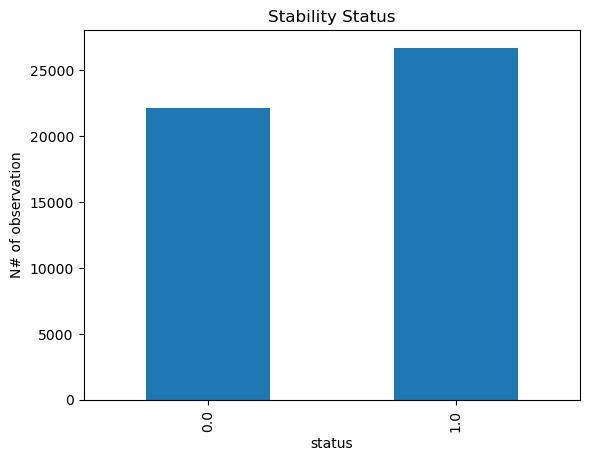

In [69]:
# frequency domain - distribution with barplots
plt.figure()
count.sort_index().plot(kind='bar')
plt.title('Stability Status')
plt.xlabel('status')
plt.ylabel('N# of observation')
plt.show()

Instead, an analysis of the variable on a time domain is basically creating a time-series chart of the variable.

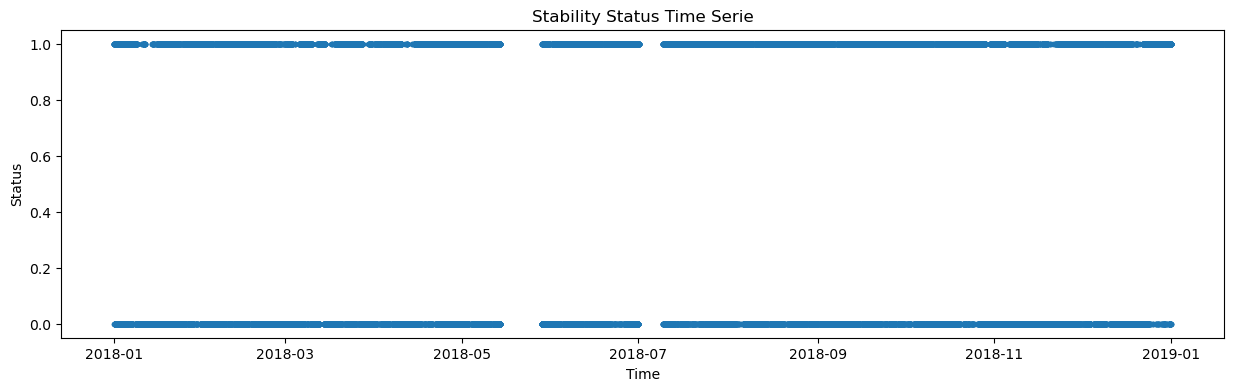

In [71]:
# Time domain - time series plot
plt.figure(figsize=(15, 4))
plt.plot(df['Date'], df['stability'], marker='.', linestyle='')
plt.title('Stability Status Time Serie')
plt.xlabel('Time')
plt.ylabel('Status')
plt.show()

This chart is difficult to interpret but we can see the holes of data through time.

On the other side, for the univariate analysis of a numerical variable, there are a couple of options to plot its distribution. The time-series plot remains identical to the previous one.

1) *Histogram*: Shows the frequency distribution of the data across intervals (bins).

2) *Box Plot*: Summarizes distribution, highlighting median, quartiles, and outliers.

3) *Density Plot* (KDE - Kernel Density Estimation.): Smooth curve representing the probability density of the variable.

4) *Violin Plot*: Combines box plot and density plot.

Let's take as example the variable active power (*ActPow*).

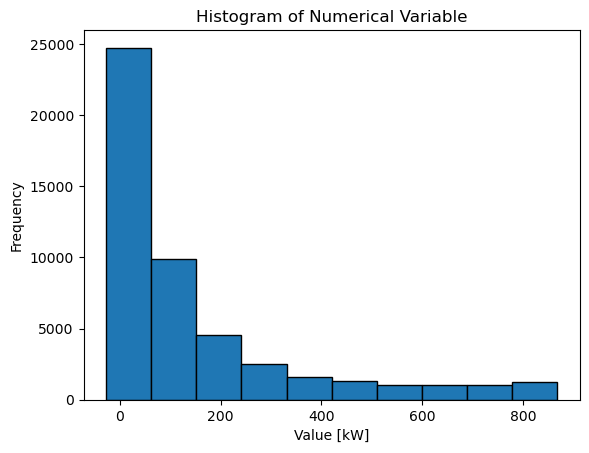

In [75]:
# Histogram of ActPow
data = df['ActPow']
plt.hist(data, bins=10, edgecolor='k')
plt.xlabel('Value [kW]')
plt.ylabel('Frequency')
plt.title('Histogram of Numerical Variable')
plt.show()

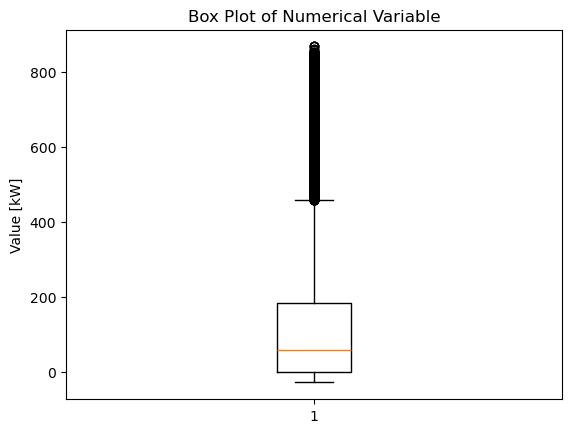

In [77]:
# Boxplot of ActPow
plt.boxplot(data)
plt.title('Box Plot of Numerical Variable')
plt.ylabel('Value [kW]')
plt.show()

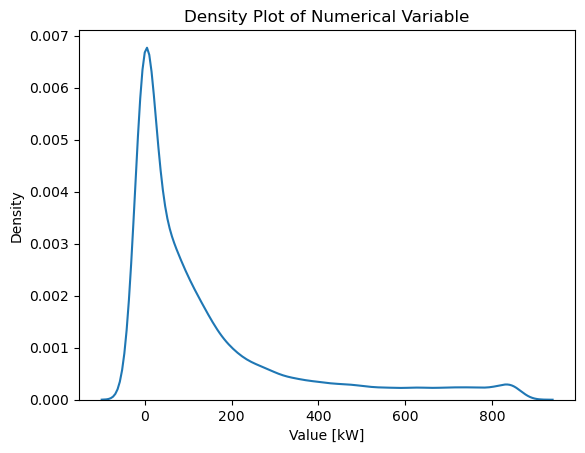

In [78]:
# KDE plot of ActPow
import seaborn as sns
sns.kdeplot(data)
plt.title('Density Plot of Numerical Variable')
plt.xlabel('Value [kW]')
plt.ylabel('Density')
plt.show()

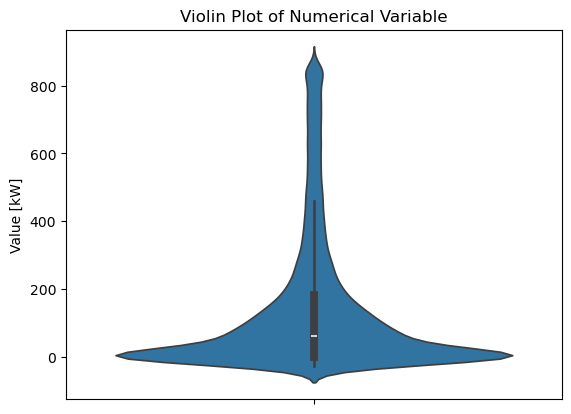

In [79]:
# Violin plot of ActPow
sns.violinplot(data=data)
plt.title('Violin Plot of Numerical Variable')
plt.ylabel('Value [kW]')
plt.show()

While in the time domain:

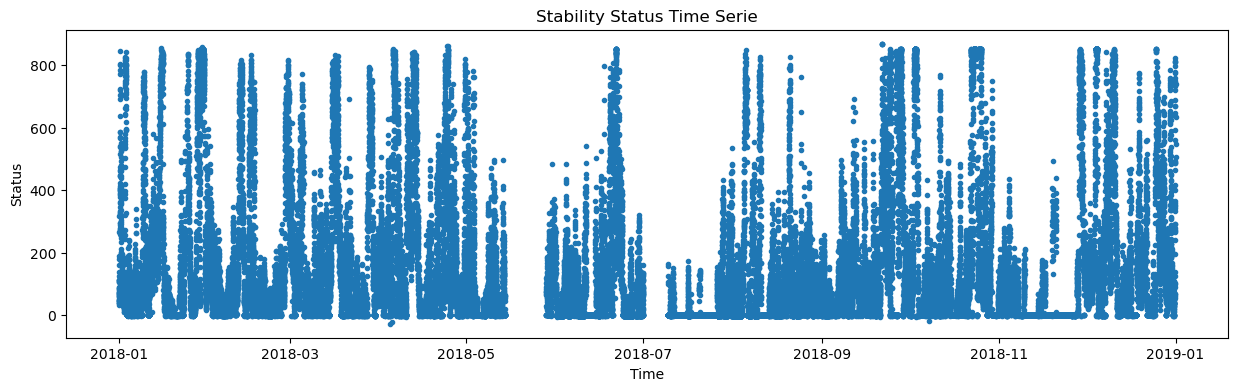

In [83]:
# Time domain - time series plot
plt.figure(figsize=(15, 4))
plt.plot(df['Date'], df['ActPow'], marker='.', linestyle='')
plt.title('Stability Status Time Serie')
plt.xlabel('Time')
plt.ylabel('Status')
plt.show()

For a better visualization, you can improve your plotting code as this example

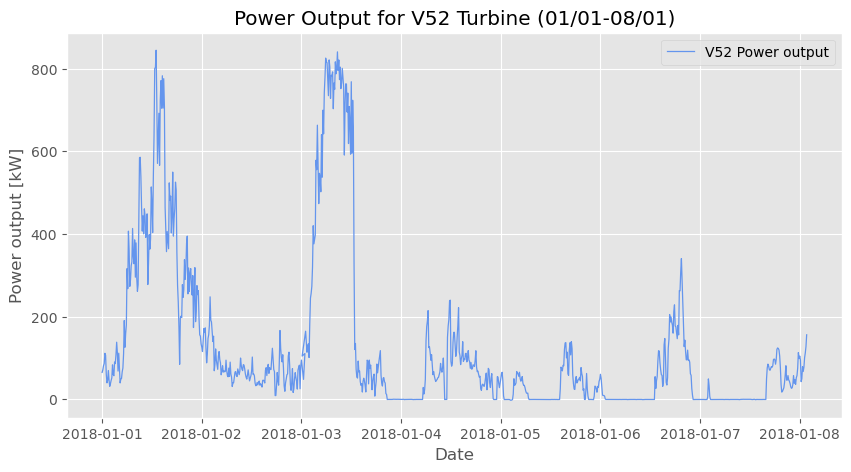

In [85]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(df['Date'][0:6*24*7], df['ActPow'][0:6*24*7], linewidth=0.9, color= 'cornflowerblue')
plt.title('Power Output for V52 Turbine (01/01-08/01)')
plt.xlabel('Date')
plt.ylabel('Power output [kW]')
plt.legend(['V52 Power output'])
plt.savefig('./images/V52_Plot.png', dpi=300)
plt.show()

# NB: if you want to both plot in console and save the figure you should place *plt.show()* only after the *savefig* command

Explore some different plots. Go and check out https://www.python-graph-gallery.com/ for some suggestions/inspiration on which plot to choose and how to generate it in python! The tool is really helpul and gives already pre-made working code.

As regard the frequency domain, for example plotting both distibutions on the same figure:

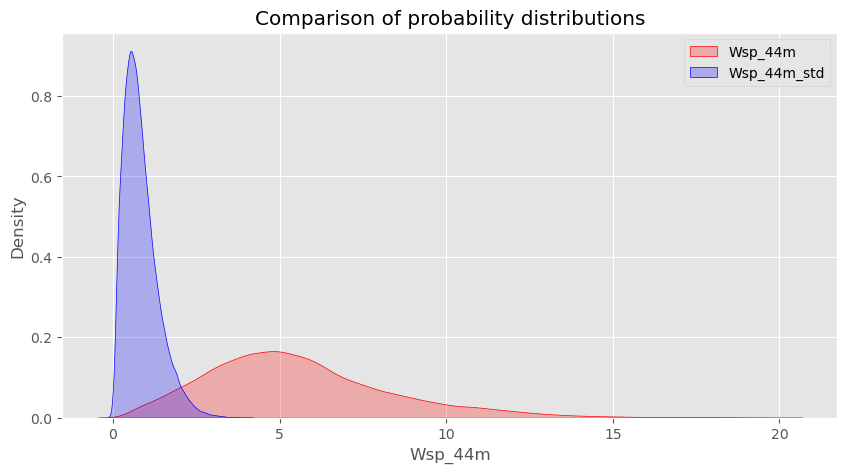

In [88]:
plt.figure(figsize=(10,5))
plt.title('Comparison of probability distributions')
fig = sns.kdeplot(df['Wsp_44m'], fill=True, color="r", label="Wsp_44m")
fig = sns.kdeplot(df['Wsp_44m_std'], fill=True, color="b", label="Wsp_44m_std")
plt.legend()
plt.show()

#### Exercize: Try it yourself

Pick some other variables of your choice and perform the univariate analysis in the time and frequency domain.
Note down some comments if it is the case.

In [91]:
df.head()

,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
0,2018-01-01 00:00:00,4.71803,200.743,64.6673,0.000860,33.4251,0.566131,6.45730,1.0
1,2018-01-01 00:10:00,5.44100,201.768,70.8152,-0.000657,26.3829,0.765691,6.66940,1.0
2,2018-01-01 00:20:00,5.32178,197.962,80.8037,-0.000617,30.2002,0.603442,6.99113,1.0
3,2018-01-01 00:30:00,5.95325,204.606,86.1123,-0.002370,43.1192,0.872915,5.47062,1.0
4,2018-01-01 00:40:00,6.17765,204.398,110.8570,0.001033,29.9507,0.550160,4.93713,1.0


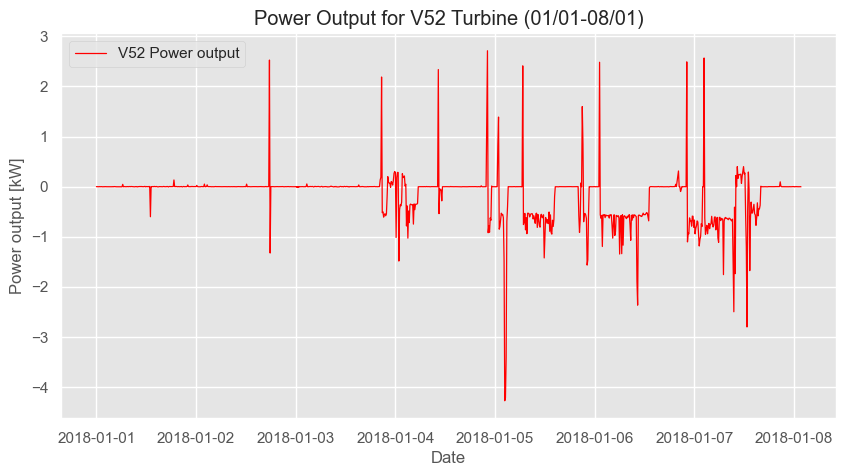

In [221]:
# Var RePow
# Your code here:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(df['Date'][0:6*24*7], df['RePow'][0:6*24*7], linewidth=0.9, color= 'red')
plt.title('Power Output for V52 Turbine (01/01-08/01)')
plt.xlabel('Date')
plt.ylabel('Power output [kW]')
plt.legend(['V52 Power output'])
plt.savefig('./images/V52_Plot.png', dpi=300)
plt.show()

In [1]:
# Var ActPow_std
# Your code here:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(df['Date'][0:6*24*7], df['ActPow_std'][0:6*24*7], linewidth=0.9, color= 'purple')
plt.title('Power Output for V52 Turbine (01/01-08/01)')
plt.xlabel('Date')
plt.ylabel('Power output [kW]')
plt.legend(['V52 Power output'])
plt.savefig('./images/V52_Plot.png', dpi=300)
plt.show()

NameError: name 'plt' is not defined

Try now to plot all the wind data in the same chart

In [3]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(df['Date'][0:6*24*7], df['RePow'][0:6*24*7], linewidth=0.9, color= 'red', label='RePow')
plt.plot(df['Date'][0:6*24*7], df['ActPow_std'][0:6*24*7], linewidth=0.9, color= 'purple', label='ActPow_std')
plt.title('Power Output for V52 Turbine (01/01-08/01)')
plt.xlabel('Date')
plt.ylabel('Power output [kW]')
plt.legend()
plt.savefig('./images/V52_Plot.png', dpi=300)
plt.show()

NameError: name 'plt' is not defined

Try now to plot all both active power and reactive power in the same chart

In [6]:
# Your code here:

### 3.2 Bivariate analysis (creating plots using seaborn)

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.


A useful tool to perform a quick-and-dirty exploratory data analysis is the **pairplot**. Here available with the *seaborn* library. This command create a multiple chart with every feature plotted against all the others. In the matrix-style in which the plot is presented, the diagonal *(i,i)* is filled with the probability density function of the respective variable *i*, highlighting its distribution (univariate analysis).
Off-diagonal elements instead represent the relation between all the variables in pairs. The final effect is a quick bivariate analysis for all the pairs of variables.
NB: mind that this command takes a lot of time.

In [12]:
import seaborn as sns
sns.set()

In [13]:
indp_vars_df = df.iloc[:, 1:]
indp_vars_df.head()

NameError: name 'df' is not defined

In [ ]:
# uncomment next line to use
#sns.pairplot(indp_vars)

Is there anything we can conclude from this first view?

Some variable are correlated, and might show a linear dependency.
Power output and wind speed forms the typical S-shaped curve typical of wind turbines.

Let's have a look at the correlation between the variables. We can look at coefficient such as the **Pearson** or **Spearman** for each pairs of variables.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = indp_vars_df.corr(method='pearson')

In [ ]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Pearson Correlation Coefficient')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

The **Pearson correlation coefficient (r)** measures the strength and direction of the linear relationship between two variables. It ranges from **-1 to 1**:

- **r = 1**: Perfect positive linear relationship (as one variable increases, the other increases proportionally).
- **r = -1**: Perfect negative linear relationship (as one variable increases, the other decreases proportionally).
- **r = 0**: No linear relationship between the variables.

It is calculated as the covariance of the two variables divided by the product of their standard deviations. Pearson’s correlation assumes the relationship is linear and both variables are continuous and normally distributed.

NB: The **Covariance** also measures the direction of the linear relationship between two variables, but its value depends on the units of the variables, making it difficult to compare across datasets. The Pearson correlation instead is the **standardized version of covariance**, dividing the covariance by the product of the variables' standard deviations. This normalizes the value to range between -1 and 1, making it easier to interpret and compare.

The formula for the **Pearson correlation coefficient (\(r\))** between two variables \(X\) and \(Y\) is:

$
r = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}
$

#### Exercize: Try it yourself

Now that you have seen already a glimpse of the bivariate analysis on the pairplot, and you know which variables are more correlated and therefore more interesting, pick some pairs of variables of your choice and perform the *bivariate analysis* on selected variables.
Produce the charts and note down some comments if it is the case.

In [ ]:
# Your code here:

In [ ]:
# Your code here:

In [ ]:
# Your code here:

In [ ]:
# Your code here:

In [ ]:
# Your code here:

## 4. Interactive data visualization: Plotly

The plotly Python package is an open-source library built on *plotly.js* (Plotly JavaScript Open Source Graphing Library) which in turn is built on *d3.js* (The JavaScript library for bespoke data visualization).
This basically means that working with Plotly we get the efficiency of coding in Python with the incredible interactive graphics capabilities of d3.

(Plotly itself is a graphics company with several products and open-source tools. The Python library is free to use, and we can make unlimited charts in offline mode plus up to 25 charts in online mode to share with the world.)

In [20]:
# plotly library for interacive plots
import plotly.offline as py
from plotly import tools
import plotly.graph_objs as go
import warnings
from ipywidgets import widgets
from ipywidgets import interact

# plotly settings to ignore warnings
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)

A plotly chart consist basically in 3 objects: traces, layout and the figure itself. The traces are the single subjects/signals to be plotted. More traces may exist in a single plot of course. The layout is the object which stores the plotting details and styles. The figure is the wrapper that contains everything. Let's dig into it step by step.

In [22]:
# create traces
trace1 = go.Scatter(
             x = df['Date'],
             y = df['Wsp_44m'],
             mode = 'lines',
             name = 'Speed')

trace2 = go.Scatter(
            x = df['Date'],
            y = df['Wdir_41m'],
            mode = 'lines',
            name = 'Direction')

NameError: name 'df' is not defined

In [ ]:
# create layout
layout = go.Layout(
    title = "Wind Information",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Value"})


Note that the layout object wants python `dictionaries` to store the details

In [26]:
# create figure
fig = go.Figure(data=[trace1, trace2], layout=layout)
# show figure
fig.show()

NameError: name 'trace1' is not defined

You can also directly define the plotly figure structure containing the objects.
Mind that only the first 7 days are selected for plotting for the sake of the representation.

In [29]:
x_time = df['Date'][0:6*24*7]                       # change numbers in brackets to change dates
y_data = df['ActPow'][0:6*24*7]                     # change numbers in brackets to change dates

fig = go.Figure(    # the "data" is a list containing the details of the traces
        data=[
            # first trace
            go.Scatter(x=x_time, y=y_data, mode='lines', name="V52")
            # other traces if needed
            ],

    # layout
        layout=go.Layout(
            title=dict(text='Weekly V52 Turbine Power Output'),
            xaxis=dict(title='Date'),
            yaxis=dict(title='Power Output [kW]')
        )
    )
fig.show()

NameError: name 'df' is not defined

If you want to save it locally you can do it in HTML format (to be opened in your browser)

In [32]:
fig.write_html(".\images\ActPowVSDate_simple.html")

NameError: name 'fig' is not defined

If you want to compare more signals and improve the quality of your chart you can use the following code.
The poltly library uses the **figure** structure to contain the elements of the chart.
The structure can contain **traces**, where new elements are contained and added to the chart, and **layouts**, which contains information on descriptive elements of the chart.
Let's have a look at the following example, comparing *active power* versus *reactive power* in the same chart.

You can also use the method `add_trace` or `update_layout` to add those objects to an already created `fig` object. It is exactly the same thing as before. Use the method you prefer.

In [35]:
# Creating figure with Plotly
fig = go.Figure()

# Adding first line for active power
x_time = df['Date'][0:6*24*7]
y_data1 = df['ActPow'][0:6*24*7]

fig.add_trace(go.Line(x=x_time,
                      y=y_data1,
                      name="Active Power"));

# Adding second line for reactive power
x_time = df['Date'][0:6*24*7]
y_data2 = df['RePow'][0:6*24*7]

fig.add_trace(go.Line(x=x_time,
                      y=y_data2,
                      name="Reactive Power",
                      # you can add some costumizations
                      line = dict(color='lightcoral', width=2, dash='dot')));

# Setting aesthetics for the plot such as Title and axes labels.
fig.update_layout(
    title=go.layout.Title(text="V52 Wind turbine", xref="paper", x=0,
                          font=dict(family="Courier New, monospace", size=18, color="#7f7f7f")),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Date", font=dict(family="Courier New, monospace",
                          size=18, color="#7f7f7f"))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Active Power [kW] Reactive Power [kvar]",
                          font=dict(family="Courier New, monospace", size=18, color="#7f7f7f"))))

fig.show()
fig.write_html(".\images\ActPowVSRePow.html")

NameError: name 'df' is not defined

Now we’ll get into a few plots that you probably won’t use all that often, but which can be quite impressive. We’ll use the plotly **figure_factory**, to keep even these incredible plots to one line.

#### Correlation Heatmaps
To visualize the correlations between numeric variables, we calculate the correlations and then make an annotated heatmap

In [38]:
import plotly.figure_factory as ff

corrs = df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

NameError: name 'df' is not defined

#### Exercize: try it yourself

Try to plot yourself and save others time-dependent variables with **plotly**:

In [ ]:
# choose your variable/variables to be plotted
# Your code here:

In [ ]:
# choose your variable/variables to be plotted
# Your code here:

Try to create always more complicated and particular plots with the given data.

In [ ]:
# choose a creative plot with the given data
# Your code here:

## 5. Data Storytelling

In the meanwhile you are trying out some plotting looking at the code above, do not forget to use your own creativity and analysis skills to understand what these data can tell us. Try to look for patterns/correlation between the variables, there might be some interesting facts/stories to tell! Do not forget that the very first powerfull machine learning algorithm is the human mind! And data visualization is the tool which makes this possible.

NB: works which investigate, find and properly put in practice data storytelling will get higher marks!

# Part 2: Web Dashboard App with Streamlit

In this part of the lab we are goint to take the data visualization to the next level. Lately, many easy-to-use frameworks to improve data visualization have risen, in particular linked with high level and flexible programming languages like python. **Streamlit** is one those, designed specifically with the idea to be easy to learn. Streamlit is an open source python based framework for developing and deploying interactive data science dashboards app.
With only a few lines of pyhton code it is possible to build awesome interactive dashboards for data visualization.

https://streamlit.io/

Checking out the documentation is strongly advised for those who are beginners and needs assistance with the installation. Docs to get started are available [here](https://docs.streamlit.io/library/get-started).

Streamlit also offers a free hosting service for applications in their website. We are going to use this to deploy (for free) our web apps for data visualization and be able to access them anytime online!

Pre-requisites to run this part of lab:

- A working installation of **python (3.7 - 3.10)** on your machine
- An integrated development environment (**IDE**) of your choice is highly recommended
- A personal **GitHub** repository

Note that the following steps are done *outside* this jupyter notebook as do not involve any scripting coding, but mostly working with the command line.

1) **Set up a new virtual environment**. It is good practice to do so when starting a new project. You can create it with **anaconda** or with the package/environment manager you are using.

2) Install the **streamlit** package in the newly created virtual environment.

3) Install also a couple of others packages for convenience, that we will need to work (*matplotlib, seaborn, plotly, numpy, pandas, plost etc*).

After these first three steps, we are already all set to start building our web app with some code. **Please do follow streamlit tutorials to get started**.

To help you at this stage it could be quicker to take a pre-made template of a web dashboards to better understand how it is done. Later on , we will costumize it to load our own flow of data.

4) Go to [this](https://github.com/andreabragantini/streamlit_test)  GitHub repository and **fork** it on your personal GitHub account. You will have an exact copy of it.

6) **Clone** the repository on your local machine and open the files in the IDE of your choice.

This last command allows you basically to download the project with the template code inside where to start from. You can also download the template code without having a Github account. Just download the zip folder and extract it in the local directory in your computer where you want to place the web app project. From here, you will need to edit the main script *streamlit_app.py* with the programming tool of your choice, an IDE for instace but also a simple text editor could work. From now on we will not code anymore in a "scripting" style, so Jupyter Notebook won't help up with this. When you are developing an application, the app code has to be compiled first. This is why now we won't evaluate line by line our script, but rather run the whole script from outside the development environment. This will allow us to see the modifications on the web-app.

5) You need to open a **terminal window**, go to the directory where your streamlit project is stored and run `streamlit run your_script.py`. As soon as you run the script as shown above, a **local Streamlit server** will spin up and your app will open in a new tab in your default web browser (the famous "localhost"). Now you can make your own modification to the code and take a look at the changes right away by refreshing the web-page pointing to your hosted local server. This local visualization is your canvas, where you'll experiment drawing charts, text, widgets, tables, and more.

Mind that the app that you see there is not "online", it's just a web server hosted on your local machine. It is of no-use, except for checking how the changes you made in the code look in the app. That's how you develop a web-app on your local machine. It is a sort of "preview" of your project.

Once you are satisfied with a first version of your dashboard web app, it is the time to deploy it in cloud server for continous operations. The streamlit website offers a basic free service to deploy web-app designed with streamlit that we can use for our experiments.

6) Go the streamlit website and register a new user.

7) Go to your personal Github account and create (if you haven't done it before) a new repository, or **commit** and **push** the changes made to the initial template. The repository now must contains the code of the web-app you are developing on you local machine.

8) Go to your streamlit personal account and add a `New App`and follow the steps.

You will be asked a "place" where streamlit server should look for to find the web-app. This place is your GitHub repository. Now, you can point directly to the personal GitHub repository that you have just created, with the new code of the app. Alternatively, just to accomplish this step, you could point to the Github repository you have forked previously (which will appear now between your personal Github repositories). Once confirming everything, you'll see in a few instances the app working and deployed on streamlit servers!

Let's now proceeding in editing and finalizing the code of the streamlit app with the purpose of creating our own web dashboard app.

9) Anytime you are satisfied with the edits, just **commit and push** to your own repository where the code is stored and the streamlit web server will automatically **deploy** the new edited dashboard!

The basic requirements for this part of the lab are: 
- be able to create a working web app, following the given instructions and online guides 
- be able move yourself betweeen GitHub and your local IDE developing the code for your web app
- accomplish some minor changes to the given web app template. 
Works that goes beyond this will get a generous plus!

# Home Assignment 1

#### API + Simple Data Visualization

This assignment correspond to Part VI of Lab 3.
Taking back the concepts seen during LAB 3 about how to stream online data from API, I want you to take one free API of your choice (available in RapidAPI marketplace for instance) and create some visualization artifacts with the library the you prefer.

The most creative and fancy work wins it all! Enjoy plotting ;)

In [122]:
import requests  
import pandas as pd
import matplotlib.pyplot as plt

# Check zones
my_token = 'ATSASQPg3AZYu'
# check for available zones
base_prod_url = "https://api.electricitymap.org/v3/zones"

# make request (this request works with no token
response = requests.get(base_prod_url)
response

data_dict = response.json()

print("Country name:")
# Extract abbreviation and name of each country
for abbreviation, country_info in data_dict.items():
    country_name = country_info["zoneName"]
    #print(f" {country_name}, {abbreviation}") #Spain is 'ES'

Country name:


In [124]:
# API endpoint and parameters
url = 'https://api.electricitymap.org/v3/carbon-intensity/history'
headers = {
    'auth-token': 'ATSASQPg3AZYu'  
}
params = {
    'zone': 'ES',  
}

# Fetch data from API
response = requests.get(url, headers=headers, params=params)
print(response)

<Response [200]>


In [125]:
data_json = response.json()

In [128]:
data = data_json['history']
#print(data)

In [130]:
carbonIntensity = []
times = []

In [132]:
for data_point in data:
    carbonIntensity.append(data_point['carbonIntensity'])
    times.append(data_point['datetime'])
#print(carbonIntensity)
#print(times)

In [134]:
# Convert each string to datetime object
from datetime import date, datetime, timedelta
times = [datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%S.%f%z") for date_str in times]

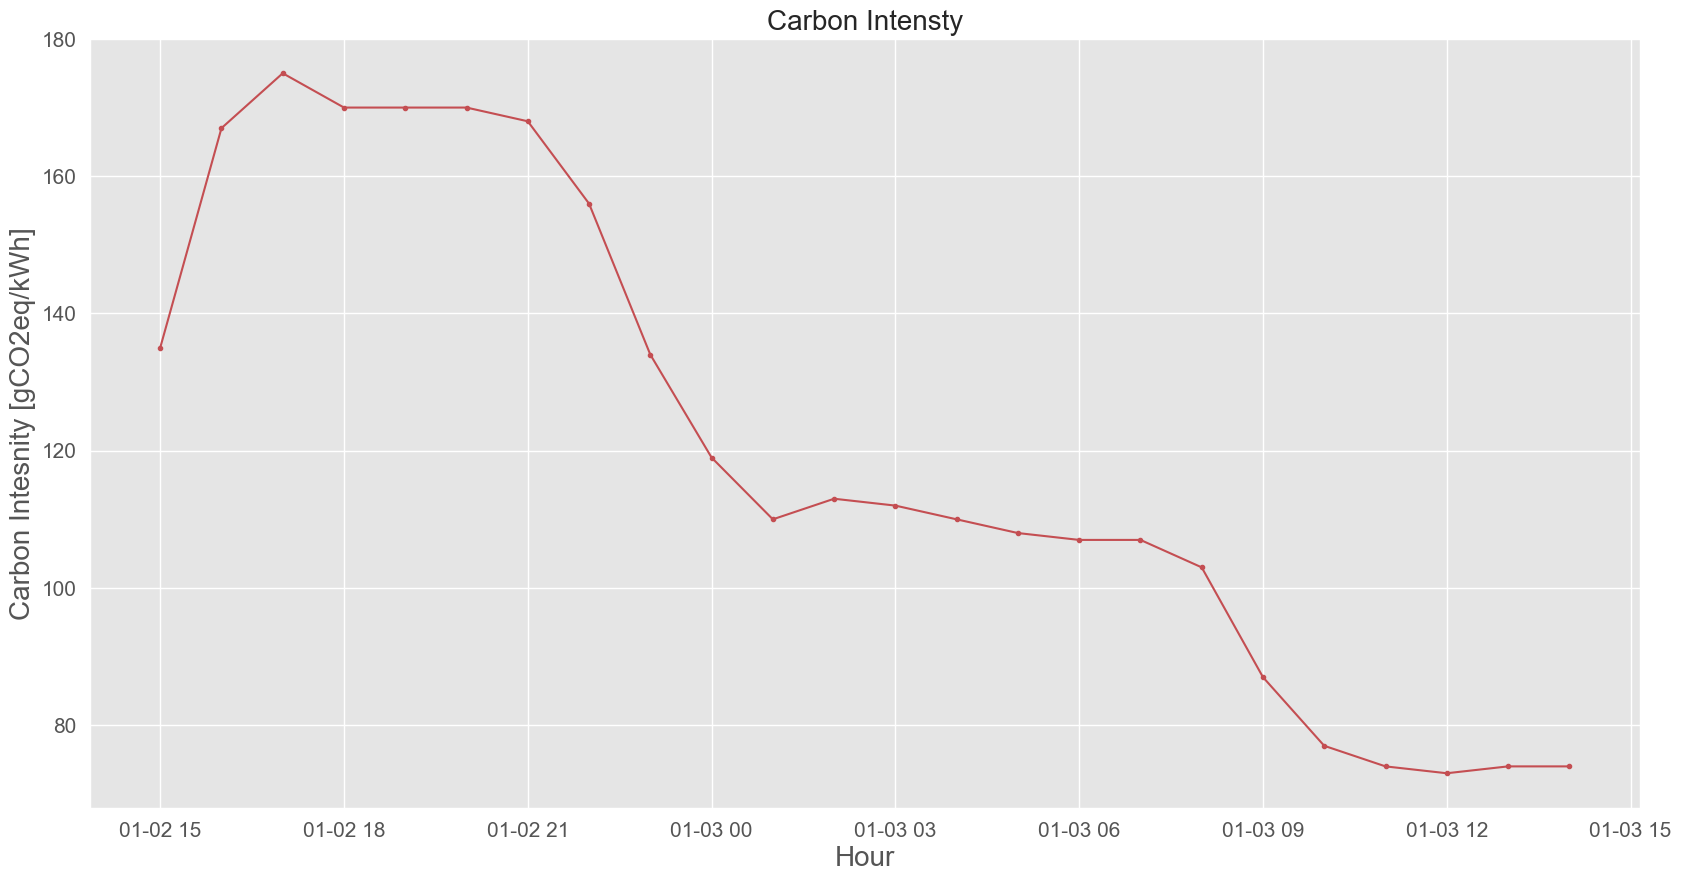

In [136]:
import matplotlib
import matplotlib.pyplot as plt 
matplotlib.rc('xtick', labelsize=15)     
matplotlib.rc('ytick', labelsize=15)
plt.style.use('ggplot')

plt.figure(figsize=(20,10))
plt.plot(times, carbonIntensity, 'r', linewidth=1.5, marker='.')
plt.title(f"Carbon Intensty", fontsize=20)
plt.xlabel('Hour', fontsize=20 )
plt.ylabel('Carbon Intesnity [gCO2eq/kWh]', fontsize=20)
plt.show()

# Home Assignment 2

#### Data Analysis and Visualization

This exercize is thought for improving your data analysis and data preparation skills. Look at the first part of the lab done in the class and repeat the same passages with a new "unseen" dataset which you dont know.

In the data folder you can find the dataset: *house_price.csv*. This dataset provides data regarding the USA house market, it is a very famous dataset for data science and machine learning exercizes. In particular, for each house (observations) available in the market there are variables describing its characteristics and its price.

The task is to repeat the steps done in the class lab activity, as the exploratory data analysis through univarite/bivariate analysis, and come up with a short data analysis of the given dataset. The focus of the analysis is the storytelling which should be backed with proper plots and charts.

Try to pay attention to **data storytelling**. What do you think the variable price is driven by? Look for some patterns...



This exercise is designed to enhance your **data analysis** and **data visualization skills**. Your task is to revisit the first part of the lab conducted in class and apply the same steps to a new, "unseen" dataset, which you are unfamiliar with.

#### Dataset
In the data folder, you will find the dataset: *house_price.csv*. This dataset contains information about the USA housing market. It is a well-known dataset in data science and machine learning exercises. Specifically, it provides data about various houses listed on the market, including their **characteristics** and **prices**.

#### Your Task
1. **Exploratory Data Analysis (EDA):** Repeat the steps we practiced in class, including:
   - **Univariate analysis:** Examine individual variables to understand their distribution and properties.
   - **Bivariate analysis:** Explore relationships between variables, especially between the features and the house price.

2. **Data Storytelling:** Focus on the **storytelling aspect** of your analysis:
   - What patterns can you observe in the data?
   - What factors seem to drive house prices?
   - Use meaningful insights to narrate a story supported by visualizations.

3. **Visualizations:** Back up your storytelling with appropriate **plots and charts** to make your findings clear and compelling.

#### Guidelines
- Pay special attention to identifying patterns that could explain variations in house prices.
- Present your insights in a concise and clear format.

Good luck, and enjoy exploring the dataset!

In [183]:
# Set up and data loading
# Your code here

In [184]:
# Data preprocessing (if, needed)
# Your code here

In [186]:
# Univariate analysis
# Your code here

In [187]:
# Bivariate analysis
# Your code here

# Home Assignment 3

#### Build a Web Dashboard with Streamlit (API + Advanced Data Visualization)
This assignment is a continuation of **Part 2** of the laboratory session, which you may not have completed during class. If you didn’t finish, now is your chance to create the **web dashboard app of your dreams** using **Streamlit**!

---

### **Important Notes**
1. **Evaluation**: 
   - **All home assignments** are subject to final evaluation. 
   - Ideally, your **team project work** should include a web dashboard app similar to the one discussed in this laboratory, to meet your project's visualization needs. 
     - If your team project contains a web dashboard, it will **also count as the submission for Home Assignment 3** and be evaluated for the **Data Visualization** component.
   - If your team project does **not** include a web dashboard (highly recommended but not mandatory), you must submit this Home Assignment 3 for evaluation instead.

2. **Requirements**:
   - Use an **API** of your choice to obtain data.
   - Design your dashboard to meet the visualization requirements of your project or your creative vision.
   - Make full use of the tools and techniques explored in class.

---

### **Deliverables**
- Submit a **link** to your web dashboard deployed in Streamlit web servers for evaluation. 
  - The dashboard should be publicly accessible to anyone with the URL.

---

### **Tips**
- Be creative and think about how your dashboard can effectively present data to its intended audience.
- Explore the possibilities with **Streamlit** and enjoy the process of building something impactful!
